In [1]:
import pandas as pd
import os
import numpy as np
from IPython.display import display
import tensorflow as tf
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.utils import np_utils
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from collections import defaultdict
from keras.optimizers import Adam
from keras.layers import Dense, Embedding, LSTM, GRU
from keras import initializers

Using TensorFlow backend.


In [2]:
def array():
    return []
mydict=defaultdict(array)

file_names=['./road_tracks/aalborg','./road_tracks/alpine-1','./road_tracks/alpine-2'
            ,'./road_tracks/brondehach','./road_tracks/corkscrew','./road_tracks/eroad','./road_tracks/e-track-3',
            './road_tracks/e-track-4','./road_tracks/e-track-5','./road_tracks/e-track-6','./road_tracks/forza',
            './road_tracks/ole-road-1','./road_tracks/ruudskogen','./road_tracks/spring','./road_tracks/street-1',
           './road_tracks/wheel-1','./road_tracks/wheel-2']
for i in file_names:
    names=[]
    for file in os.listdir(i):
        if file.endswith(".csv"):
            #print(os.path.join("./", file))
            names.append(os.path.join(i, file))
            print os.path.join(i, file)
    mydict[i]=names

./road_tracks/aalborg/24.csv
./road_tracks/aalborg/19.csv
./road_tracks/aalborg/11.csv
./road_tracks/aalborg/4.csv
./road_tracks/aalborg/26.csv
./road_tracks/aalborg/9.csv
./road_tracks/aalborg/10.csv
./road_tracks/aalborg/16.csv
./road_tracks/aalborg/8.csv
./road_tracks/aalborg/5.csv
./road_tracks/aalborg/21.csv
./road_tracks/aalborg/3.csv
./road_tracks/aalborg/25.csv
./road_tracks/aalborg/23.csv
./road_tracks/aalborg/20.csv
./road_tracks/aalborg/13.csv
./road_tracks/aalborg/28.csv
./road_tracks/aalborg/30.csv
./road_tracks/aalborg/1.csv
./road_tracks/aalborg/18.csv
./road_tracks/aalborg/6.csv
./road_tracks/aalborg/7.csv
./road_tracks/aalborg/22.csv
./road_tracks/aalborg/15.csv
./road_tracks/aalborg/2.csv
./road_tracks/aalborg/17.csv
./road_tracks/aalborg/14.csv
./road_tracks/aalborg/27.csv
./road_tracks/aalborg/12.csv
./road_tracks/aalborg/29.csv
./road_tracks/alpine-1/24.csv
./road_tracks/alpine-1/19.csv
./road_tracks/alpine-1/11.csv
./road_tracks/alpine-1/4.csv
./road_tracks/alpine

In [3]:
Xtrain=np.zeros(73)
ytrain=np.zeros(4)
Xval=np.zeros(73)
yval=np.zeros(4)    
keys=mydict.keys()
for k in keys:
    print k
    names=mydict[k]
    j=1
    for i in names:
        data=pd.read_csv(i)
        #print data.columns
        #print len(data.columns)
        del data[' CurrentLapTime']
        data=data.dropna()
        data=data.values
        if j<=28:
            Xtrain=np.vstack((Xtrain,data[:,:73]))
            ytrain=np.vstack((ytrain,data[:,[-5,-4,-3,-1]]))
        else:
            Xval=np.vstack((Xval,data[:,:73]))
            yval=np.vstack((yval,data[:,[-5,-4,-3,-1]]))
        j+=1
        #print Xtrain.shape
        #print ytrain.shape
Xtrain=Xtrain[1:]
ytrain=ytrain[1:]
Xval=Xval[1:]
yval=yval[1:]

./road_tracks/brondehach
./road_tracks/ruudskogen
./road_tracks/street-1
./road_tracks/forza
./road_tracks/aalborg
./road_tracks/e-track-5
./road_tracks/spring
./road_tracks/eroad
./road_tracks/alpine-1
./road_tracks/ole-road-1
./road_tracks/wheel-2
./road_tracks/alpine-2
./road_tracks/wheel-1
./road_tracks/e-track-3
./road_tracks/e-track-4
./road_tracks/corkscrew
./road_tracks/e-track-6


print Xtrain.shape
print Xval.shape
names=[]
for file in os.listdir("./c-speedway"):
    if file.endswith(".csv"):
        #print(os.path.join("./", file))
        names.append(os.path.join("./c-speedway", file))
j=1
for i in names:
    data=pd.read_csv(i)
    print i
    #print data.columns
    #print len(data.columns)
    del data[' CurrentLapTime']
    data=data.values
    if j<=28:
        Xtrain=np.vstack((Xtrain,data[:,:73]))
        ytrain=np.vstack((ytrain,data[:,[-5,-4,-3,-1]]))
    else:
        Xval=np.vstack((Xval,data[:,:73]))
        yval=np.vstack((yval,data[:,[-5,-4,-3,-1]]))
    j+=1

In [4]:
print Xtrain.shape
print ytrain.shape
print Xval.shape
print yval.shape
#print np.argwhere(ytrain[:,1]==np.nan)
#print np.argwhere(yval[:,1]==np.nan)

(7914420, 73)
(7914420, 4)
(570030, 73)
(570030, 4)


#from sklearn.preprocessing import StandardScaler
#SS=StandardScaler()
Xtrain=SS.fit_transform(Xtrain)
#print SS.mean_
Xval=Xval-SS.mean_
Xval=Xval/SS.scale_

In [5]:
mean1=np.mean(Xtrain,axis=0)
std1=np.std(Xtrain,axis=0)
Xtrain-=mean1
Xtrain/=std1
Xval-=mean1
Xval/=std1

In [6]:
print np.max(Xval,axis=0)
print np.max(Xtrain,axis=0)
print np.max(Xval,axis=0)-np.max(Xtrain,axis=0)

[ 10.7937995    4.02199604   3.9631125    4.91414343   0.96945284
   2.18230971   3.22777605   0.48280224   0.30721757   0.24259211
   0.19365049   0.16144993   0.14010995   0.11945007   0.10334269
   0.09632415   0.09678248   0.0989198    0.10488009   0.11513269
   0.13333954   0.16010394   0.18992601   0.23426159   0.39235986
   0.40859869   0.27504722   0.20611495   0.16342354   0.1349647
   0.12093616   0.11192235   0.10532554   0.10678793   0.1103372
   0.11781511   0.13082231   0.14989912   0.17441721   0.21274631
   0.2775179    0.37374183   0.50893578   1.44109464   1.83244622
   2.24343975  28.75932643   4.7528484   45.45930484  44.23065677
  38.58314484  27.73921814  12.66547123  10.3969761    7.54173105
   3.46387738   2.06775165   2.06723142   2.10520004   3.26358741
   5.33269245   9.79282728  12.84047622  26.21779515  37.64945246
  44.68971738  45.24194509   7.48834856   2.27606801   2.24800208
   2.25417145   2.22356638  73.70914523]
[  1.08073734e+01   4.60639069e+00   

In [9]:
model=Sequential()
model.add(Dense(1024,input_shape=[73],activation='relu',
                kernel_initializer='lecun_normal'))
model.add(Dense(512,activation='relu',kernel_initializer='lecun_normal'))
model.add(Dense(256,activation='relu',kernel_initializer='lecun_normal'))
model.add(Dense(128,activation='relu',kernel_initializer='lecun_normal'))
model.add(Dense(64,activation='relu',kernel_initializer='lecun_normal'))
model.add(Dense(32,activation='relu',kernel_initializer='lecun_normal'))
model.add(Dense(16,activation='relu',kernel_initializer='lecun_normal'))
model.add(Dense(8,activation='relu',kernel_initializer='lecun_normal'))
model.add(Dense(4,kernel_initializer='lecun_normal'))
adam=Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
model.summary()
model.compile(loss='mean_squared_error',               
          optimizer=adam,
          metrics=['mean_absolute_error']
     )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              75776     
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
__________

In [10]:
res = model.fit(Xtrain,ytrain,batch_size=2048, epochs=75, validation_data=(Xval,yval),callbacks=callbacks_list)

Train on 7914420 samples, validate on 570030 samples
Epoch 1/75
7914420/7914420 [==============================] - 417s 53us/step - loss: 0.0104 - mean_absolute_error: 0.0409 - val_loss: 0.0063 - val_mean_absolute_error: 0.0284
Epoch 2/75
7914420/7914420 [==============================] - 414s 52us/step - loss: 0.0052 - mean_absolute_error: 0.0254 - val_loss: 0.0051 - val_mean_absolute_error: 0.0244
Epoch 3/75
7914420/7914420 [==============================] - 413s 52us/step - loss: 0.0044 - mean_absolute_error: 0.0224 - val_loss: 0.0045 - val_mean_absolute_error: 0.0207
Epoch 4/75
7914420/7914420 [==============================] - 413s 52us/step - loss: 0.0039 - mean_absolute_error: 0.0205 - val_loss: 0.0042 - val_mean_absolute_error: 0.0205
Epoch 5/75
7914420/7914420 [==============================] - 414s 52us/step - loss: 0.0036 - mean_absolute_error: 0.0193 - val_loss: 0.0042 - val_mean_absolute_error: 0.0202
Epoch 6/75
7914420/7914420 [==============================] - 414s 52us/

Epoch 23/75
7914420/7914420 [==============================] - 412s 52us/step - loss: 0.0020 - mean_absolute_error: 0.0131 - val_loss: 0.0030 - val_mean_absolute_error: 0.0147
Epoch 24/75
7914420/7914420 [==============================] - 412s 52us/step - loss: 0.0019 - mean_absolute_error: 0.0129 - val_loss: 0.0029 - val_mean_absolute_error: 0.0141
Epoch 25/75
7914420/7914420 [==============================] - 412s 52us/step - loss: 0.0019 - mean_absolute_error: 0.0128 - val_loss: 0.0029 - val_mean_absolute_error: 0.0139
Epoch 26/75
7914420/7914420 [==============================] - 412s 52us/step - loss: 0.0019 - mean_absolute_error: 0.0126 - val_loss: 0.0028 - val_mean_absolute_error: 0.0145
Epoch 27/75
7914420/7914420 [==============================] - 412s 52us/step - loss: 0.0018 - mean_absolute_error: 0.0125 - val_loss: 0.0029 - val_mean_absolute_error: 0.0142
Epoch 28/75
7914420/7914420 [==============================] - 412s 52us/step - loss: 0.0018 - mean_absolute_error: 0.01

Epoch 73/75
7914420/7914420 [==============================] - 412s 52us/step - loss: 0.0012 - mean_absolute_error: 0.0101 - val_loss: 0.0026 - val_mean_absolute_error: 0.0121
Epoch 74/75
7914420/7914420 [==============================] - 412s 52us/step - loss: 0.0012 - mean_absolute_error: 0.0101 - val_loss: 0.0026 - val_mean_absolute_error: 0.0122
Epoch 75/75
7914420/7914420 [==============================] - 412s 52us/step - loss: 0.0012 - mean_absolute_error: 0.0101 - val_loss: 0.0026 - val_mean_absolute_error: 0.0120


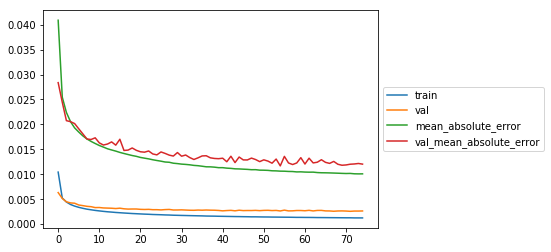

In [11]:
x = range(75)
    # plt.plot(x, res.history['acc'], label='train')
    # plt.plot(x, res.history['val_acc'], label='val')
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.show()

plt.plot(x, res.history['loss'], label='train')
plt.plot(x, res.history['val_loss'], label='val')
plt.plot(x,res.history['mean_absolute_error'],label='mean_absolute_error')
plt.plot(x,res.history['val_mean_absolute_error'],label='val_mean_absolute_error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
model.load_weights("weights-improvement-72-0.0013.hdf5")

In [17]:
weights=[]
for layer in model.layers:
    weights.append(layer.get_weights())
    
weights=np.array(weights)
print weights.shape

(9, 2)


In [19]:
W1=weights[0,0]
b1=weights[0,1]
W2=weights[1,0]
b2=weights[1,1]
W3=weights[2,0]
b3=weights[2,1]
W4=weights[3,0]
b4=weights[3,1]
W5=weights[4,0]
b5=weights[4,1]
W6=weights[5,0]
b6=weights[5,1]
W7=weights[6,0]
b7=weights[6,1]
W8=weights[7,0]
b8=weights[7,1]
W9=weights[8,0]
b9=weights[8,1]
np.savetxt('W1',W1)
np.savetxt('W2',W2)
np.savetxt('W3',W3)
np.savetxt('W4',W4)
np.savetxt('W5',W5)
np.savetxt('W6',W6)
np.savetxt('W7',W7)
np.savetxt('W8',W8)
np.savetxt('W9',W9)

np.savetxt('b1',b1)
np.savetxt('b2',b2)
np.savetxt('b3',b3)
np.savetxt('b4',b4)
np.savetxt('b5',b5)
np.savetxt('b6',b6)
np.savetxt('b7',b7)
np.savetxt('b8',b8)
np.savetxt('b9',b9)

In [21]:
np.savetxt('mean1',mean1)
np.savetxt('std1',std1)

In [22]:
print Xval[0].shape

(73,)


In [26]:
out1=np.dot(Xval[100],W1)+b1
out1[out1<0]=0.0
out2=np.dot(out1,W2)+b2
out2[out2<0]=0.0
out3=np.dot(out2,W3)+b3
out3[out3<0]=0.0
out4=np.dot(out3,W4)+b4
out4[out4<0]=0.0
out5=np.dot(out4,W5)+b5
out5[out5<0]=0.0
out6=np.dot(out5,W6)+b6
out6[out6<0]=0.0
out7=np.dot(out6,W7)+b7
out7[out7<0]=0.0
out8=np.dot(out7,W8)+b8
out8[out8<0]=0.0
out9=np.dot(out8,W9)+b9
print out9
#print out4

[ 0.9766302   0.00383111  0.64559564  0.02544233]


In [27]:
print Xval[0].shape
print model.predict(Xval[100:101])

(73,)
[[ 0.97663021  0.00383111  0.64559567  0.02544206]]
